In [69]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 3 (a)

In [70]:
def bayes(y,sigmax,sigmay,H,mu):
    K  =   sigmax@H.T@np.linalg.inv((sigmay +  H@sigmax@H.T))
    mu_star  =  mu + K@(y - H@mu)
    sigma_star  = (np.eye(len(K)) -  K@H)@sigmax
    return mu_star,sigma_star

In [71]:
mu =  np.array([76.9,91,114.2,154.2,88.1,18.6,11.4,31.1,69.6,105.7,112.7,77.4])
y  =  np.array([80,90,110,160,80,20,10,40,70,100,110,80])
N =  len(y)
H =  np.eye(N)
sigmay =  0.25 * np.eye(N)
sigmax = 0.1 * np.eye(N)

In [72]:
mu_star,sigma_star = bayes(y,sigmax,sigmay,H,mu)
t  =  np.linspace(1,N,N)

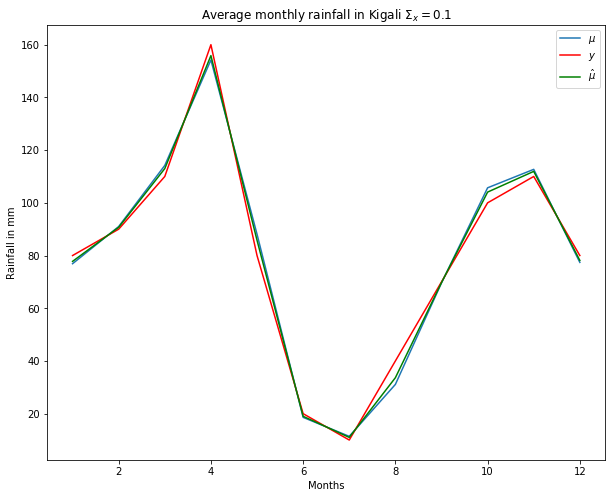

In [73]:
plt.figure(figsize=(10,8))
plt.plot(t,mu,label=r"$\mu$")
plt.plot(t,y,'r',label=r"$y$")
plt.plot(t,mu_star,'g',label=r"$\hat{\mu}$")
plt.xlabel('Months')
plt.ylabel('Rainfall in mm')
plt.title(r'Average monthly rainfall in Kigali $\Sigma_x = 0.1$')
plt.legend()
plt.show()

## Exercise 3(b)

In [74]:
sigmax = 0.25 * np.eye(N)
mu_star,sigma_star = bayes(y,sigmax,sigmay,H,mu)

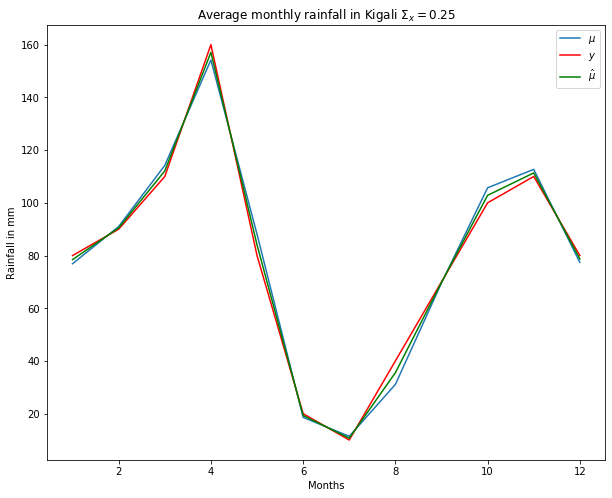

In [75]:
plt.figure(figsize=(10,8))
plt.plot(t,mu,label=r"$\mu$")
plt.plot(t,y,'r',label=r"$y$")
plt.plot(t,mu_star,'g',label=r"$\hat{\mu}$")
plt.xlabel('Months')
plt.ylabel('Rainfall in mm')
plt.title(r'Average monthly rainfall in Kigali $\Sigma_x = 0.25$')
plt.legend()
plt.show()

## Exercise 3(c)

In [76]:
# We are updaing H to 0 for July and August months
H[6,6] = 0
H[7,7] = 0
mu_star,sigma_star = bayes(y,sigmax,sigmay,H,mu)


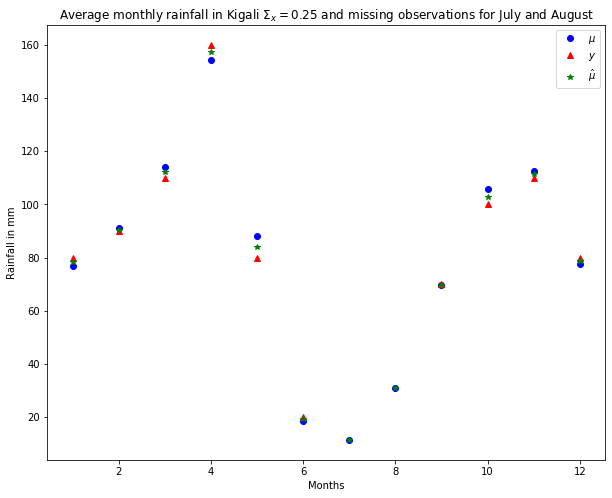

In [77]:
plt.figure(figsize=(10,8))
plt.plot(t,mu,'bo',label=r"$\mu$")
plt.plot(np.concatenate((t[0:6],t[8:]),axis=None),np.concatenate((y[0:6],y[8:]),axis=None),'r^',label=r"$y$")
plt.plot(t,mu_star,'g*',label=r"$\hat{\mu}$")
plt.xlabel('Months')
plt.ylabel('Rainfall in mm')
plt.title(r'Average monthly rainfall in Kigali $\Sigma_x = 0.25$ and missing observations for July and August')
plt.legend()
plt.show()